In [1]:
# For Data
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

#  For Visualization
import matplotlib.pyplot as plt
import plotly.express as px
import missingno as msno
from wordcloud import WordCloud

# For NLP
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

import seaborn as sns

plt.style.use('default')# For Data
import pandas as pd
import numpy as np

#  For Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud

# For NLP
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfTransformer

from sklearn.metrics import f1_score

# For Clustering
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
# For Styling
plt.style.use('default')

In [2]:
teste = pd.read_csv("Corona_NLP_test.csv")
treino = pd.read_csv("Corona_NLP_train.csv",encoding='latin-1')

df = pd.concat([teste,treino])
df = df.sample(frac=0.7, random_state=42)
df['TweetAt'] = pd.to_datetime(df['TweetAt'],format="%d-%m-%Y")
df['Length'] = df['OriginalTweet'].apply(len)

Text(0.5, 1.0, 'Valores Nulos por Coluna')

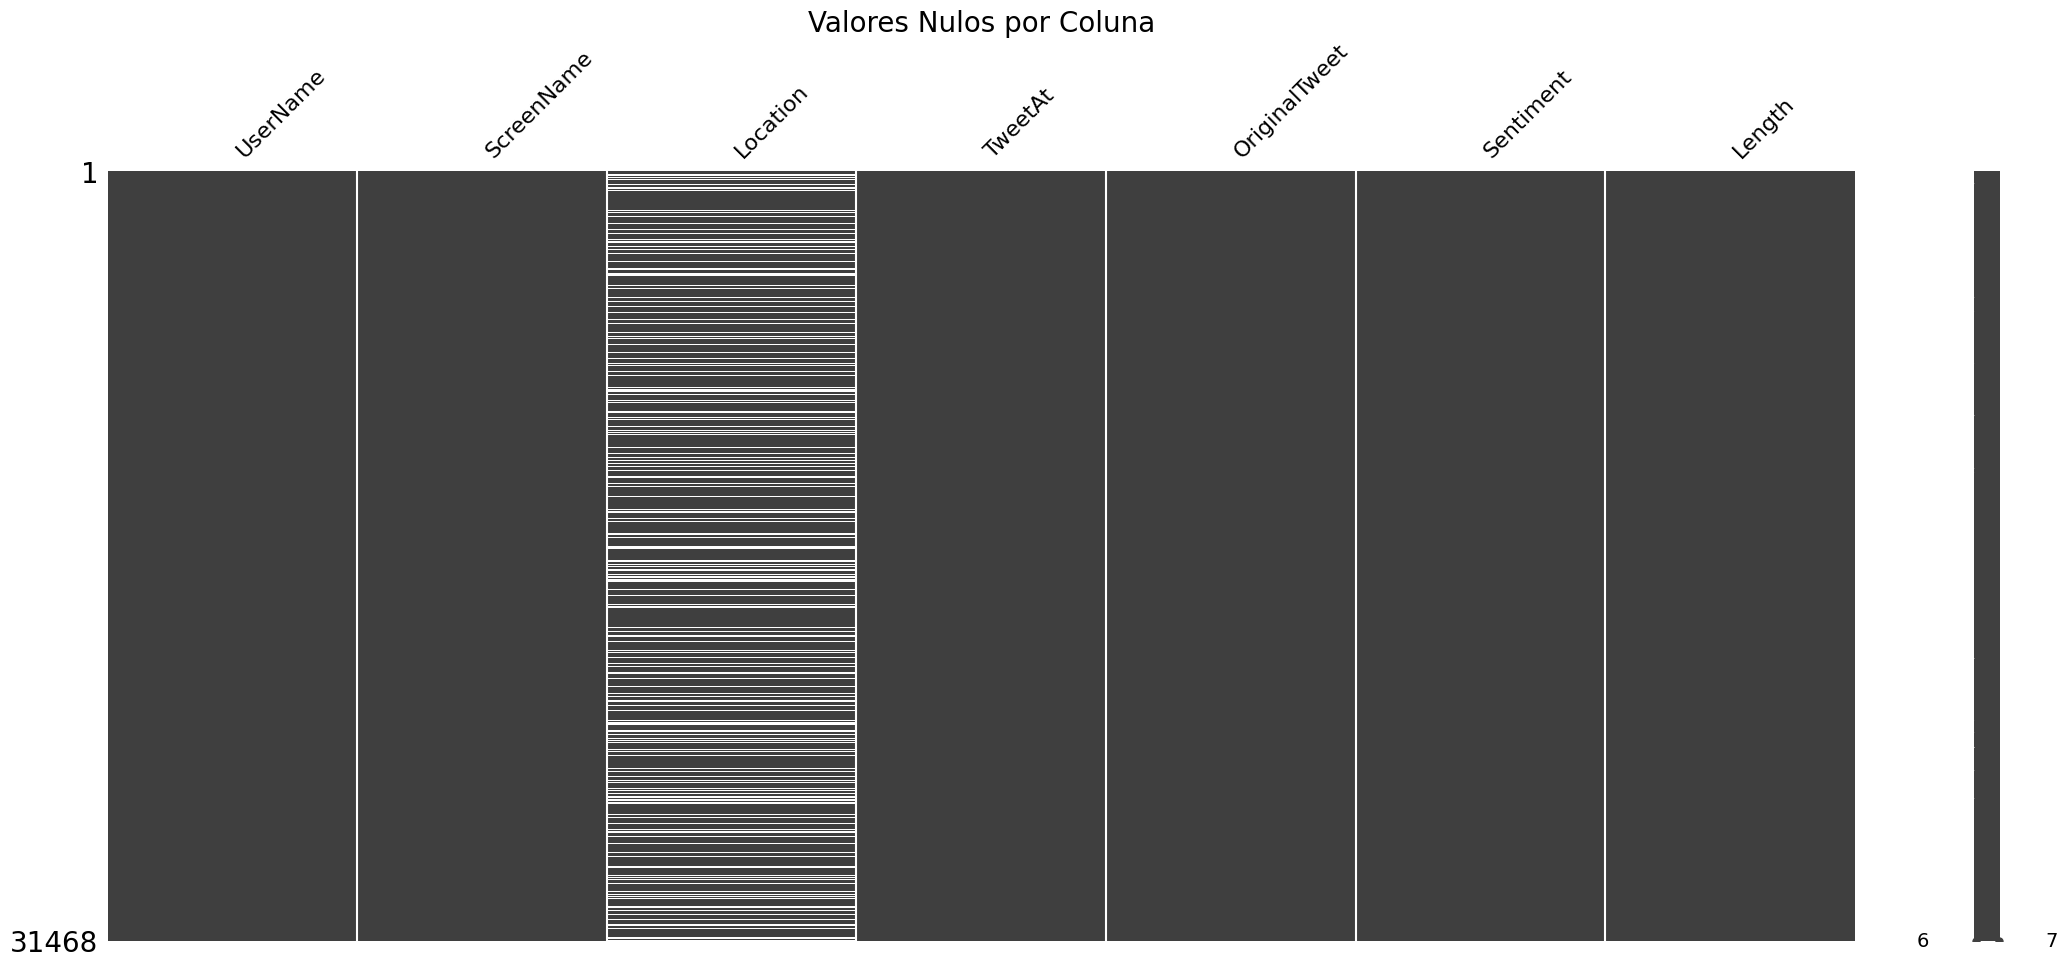

In [3]:
msno.matrix(df)
plt.title('Valores Nulos por Coluna',fontsize=20)

In [4]:
df.dropna(inplace=True)

In [5]:
df.isna().count()

UserName         24871
ScreenName       24871
Location         24871
TweetAt          24871
OriginalTweet    24871
Sentiment        24871
Length           24871
dtype: int64

In [6]:
location = df['Location'].value_counts()[:10]
fig = px.bar(x=location.index,y=location.values,text=location.values,
       color = location.index, color_discrete_sequence=px.colors.sequential.deep,
        title = 'Top 10 Locais',
        template = 'simple_white')

fig.update_traces(textposition='inside',
                  textfont_size=11)

fig.update_layout(
    xaxis_title = 'Locais',
    yaxis_title = 'Numero de Tweets',
    font=dict(size=17,family="Times New Roman"),)

fig.show()

# Sentimentos

In [7]:
sentiment = df["Sentiment"].value_counts()
fig = px.pie(values=sentiment.values, 
             names=sentiment.index,
             color_discrete_sequence=px.colors.sequential.Greens)
fig.update_traces(textposition='inside',
                  textfont_size=11,
                  textinfo='percent+label')

fig.update_layout(title_text="Grafico de Pizza",
                  uniformtext_minsize=12, 
                  uniformtext_mode='hide')

fig.show()

In [8]:
def get_all_str(tweet):
    sentence = ''
    for words in tweet:
        sentence += words
    sentence = sentence.lower()
    return sentence

def get_str(lst):
    sentence = ''
    for char in lst:
        sentence += char+' '
    sentence = sentence.lower()
    return sentence

def get_word(text): 
    result = nltk.RegexpTokenizer(r'\w+').tokenize(text.lower())
    return result

def get_hashtag(text):
    result = nltk.RegexpTokenizer(r'(?<=#)\w+').tokenize(text.lower())
    return result

def get_mention(text):
    result = nltk.RegexpTokenizer(r'(?<=@)\w+').tokenize(text.lower())
    return result 

def stopword_list(stop):
    lst = stopwords.words('english')
    for stopword in stop:
        lst.append(stopword)
    return lst

def remove_stopword(stopwords, lst):    
    stoplist = stopword_list(stopwords)
    txt = ''
    for idx in range(len(lst)):
        txt += lst[idx]
        txt += '\n'
    cleanwordlist = [word for word in txt.split() if word not in stoplist] 
#     print(stoplist)
    return cleanwordlist

def pos_remove_noun(tagged):
    remove_noun = [word for word,pos in tagged if pos not in ['NN','NNS','NNP','NNPS']]
    txt = ''
    for i in range(len(remove_noun)):
        txt += remove_noun[i]
        txt += '\n'
    return cleanwordlist

def lemmatization(words):
    lemm = WordNetLemmatizer()
    tokens = [lemm.lemmatize(word) for word in words]
#     txt= ' '.join(tokens)
    return tokens

def Freq_df(cleanwordlist):
    Freq_dist_nltk = nltk.FreqDist(cleanwordlist)
    df_freq = pd.DataFrame.from_dict(Freq_dist_nltk, orient='index')
    df_freq.columns = ['Frequency']
    df_freq.index.name = 'Term'
    df_freq = df_freq.sort_values(by=['Frequency'],ascending=False)
    df_freq = df_freq.reset_index()
    return df_freq

def Word_Cloud(data, color_background, colormap, title):
    plt.figure(figsize = (15,20))
    wc = WordCloud(width=800, 
               height=400, 
               max_words=50,
               colormap= colormap,
               max_font_size=140,
               random_state=8888, 
               background_color=color_background).generate_from_frequencies(data)
    
    plt.imshow(wc, interpolation='bilinear')
    plt.title(title, fontsize=20)
    plt.axis('off')
    plt.show()

In [9]:
def whole_string(sent):
    all_str = get_all_str(sent)
    words = get_word(all_str)
    removed = remove_stopword(['http','https','co'],words)
    freq_df = Freq_df(removed)
    return freq_df

In [10]:
freq_df = whole_string(df['OriginalTweet'])
top_10 = freq_df[:10]

fig = px.bar(top_10, x = 'Term', y = 'Frequency',text = 'Frequency', color='Frequency',
             color_discrete_sequence=px.colors.sequential.PuBuGn, title = 'Frequencia',
             template = 'simple_white')
    
fig.update_traces(textposition='inside',
                  textfont_size=11)
fig.show()

# Visualizaçao usando WordCLoud


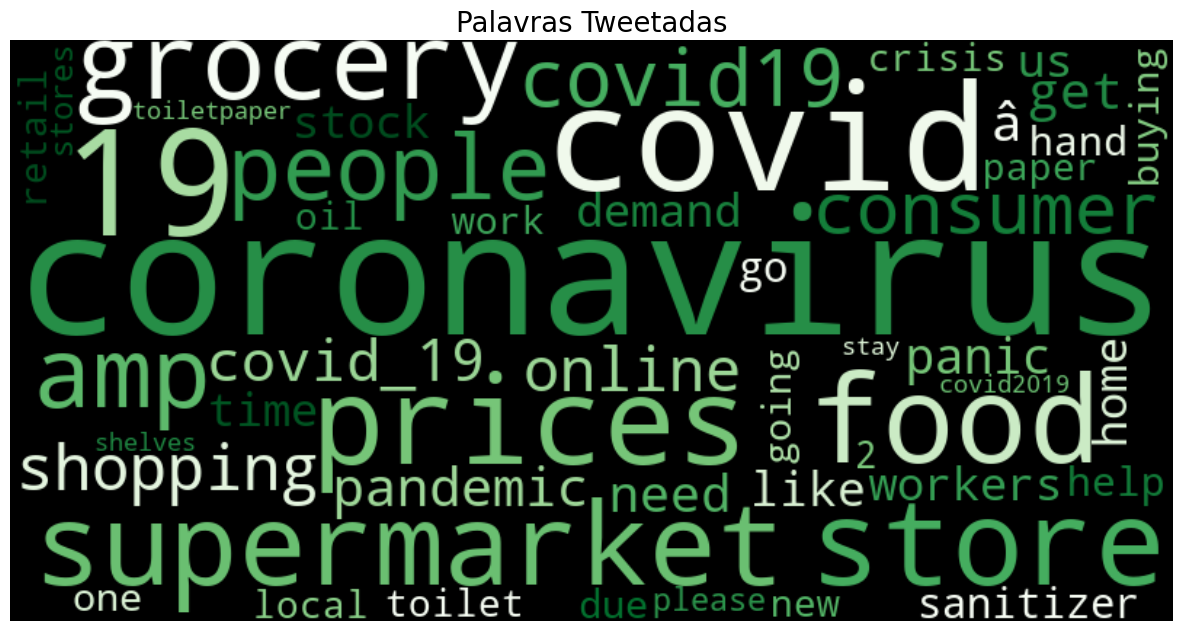

In [11]:
data = freq_df.set_index('Term').to_dict()['Frequency']

Word_Cloud(data ,'black', 'Greens_r', 'Palavras Tweetadas')


# Processamento das palavras
Limpando o texto


In [12]:
import re
def clean(text):

    #     remove urls
    text = re.sub(r'http\S+', " ", text)

    #     remove mentions
    text = re.sub(r'@\w+',' ',text)

    #     remove hastags
    text = re.sub(r'#\w+', ' ', text)

    #     remove digits
    text = re.sub(r'\d+', ' ', text)

    #     remove html tags
    text = re.sub('r<.*?>',' ', text)
    

    
      
    return text

In [13]:
df['OriginalTweet'] = df['OriginalTweet'].apply(lambda x: clean(x))

In [14]:
# nltk.download("wordnet")
# nltk.download('stopwords')
def preprocessing(text):
    words = get_word(text)
    lemma = lemmatization(words)
    removed = remove_stopword(['http','ly','r<.*?>',r'\d+', r'#\w+'],lemma)
    return removed

df['OriginalTweet'] = df['OriginalTweet'].apply(preprocessing)
df['OriginalTweet'] = df['OriginalTweet'].apply(get_str)

In [15]:
print(df.shape)
df.tail(5)

(24871, 7)


,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Length
844,4643,49595,"Brooklyn, NY",2020-03-17,let know cletus meme rich,Neutral,172
2522,6321,51273,India,2020-03-17,whether consumer step home â stay,Neutral,135
33580,37379,82331,London,2020-04-08,interviewed explore expectation flexible pande...,Positive,134
40549,44348,89300,"Dallas, TX",2020-04-13,massive consumer study reveals real world beha...,Neutral,137
12309,16108,61060,"Los Angeles, CA",2020-03-21,thank deeply healthcare worker also sanitation...,Extremely Positive,189


# Count Vecttorizer
Converte o texto dos documentos em um vetor de termos

In [ ]:

# from sklearn.feature_extraction.text import CountVectorizer

# vector = CountVectorizer()
# X = vector.fit(df['OriginalTweet'])
# X_transform = X.transform(df['OriginalTweet'])

# Tf-IDF


In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

Tfidf = TfidfVectorizer(stop_words='english', norm='l2' )
X = Tfidf.fit_transform(df["OriginalTweet"]).toarray()

In [17]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [18]:
def classes_def(x):
    if x ==  "Extremely Positive":
        return "positive"
    elif x == "Extremely Negative":
        return "negative"
    elif x == "Negative":
        return "negative"
    elif x ==  "Positive":
        return "positive"
    else:
        return "neutral"
    
df['sentiment']=df['Sentiment'].apply(lambda x:classes_def(x))
target=df['sentiment']

df.sentiment.value_counts(normalize= True)

sentiment
positive    0.438382
negative    0.374412
neutral     0.187206
Name: proportion, dtype: float64

<Axes: xlabel='sentiment', ylabel='count'>

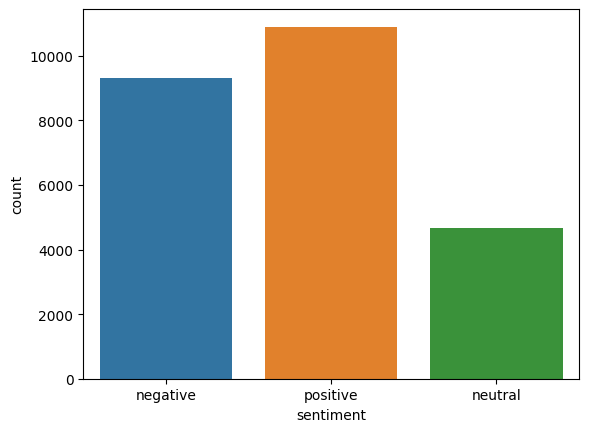

In [19]:
sns.countplot(x=df['sentiment'])

# PCA


In [21]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
PCA = pca.fit(X.toarray())
X_pca = pca.transform(X).toarray()

AttributeError: 'numpy.ndarray' object has no attribute 'toarray'

In [ ]:
X_pca

array([[ 0.0059034 , -0.0268217 ],
       [ 0.14355206,  0.04414365],
       [ 0.00341728, -0.08084074],
       ...,
       [-0.0352881 ,  0.0252139 ],
       [-0.09441639,  0.09403093],
       [ 0.19531488,  0.04031733]])

In [ ]:
kmeanModel = KMeans(n_clusters=3)
kmeanModel.fit(X_pca)
pred_labels = kmeanModel.labels_
pred_centers = kmeanModel.cluster_centers_
df_centers = pd.DataFrame(pred_centers, columns=['x', 'y'])
df_centers.head(1)

,x,y
0,0.149177,0.034921


In [ ]:
dfcl = pd.DataFrame(columns=['x','y','label'])
dfcl['x'] = X_pca[:,0]
dfcl['y'] = X_pca[:,1]
dfcl['label'] = kmeanModel.labels_
dfcl.head(1)

,x,y,label
0,0.005903,-0.026822,2


Text(0.5, 1.0, 'Gráfico sem rotulação')

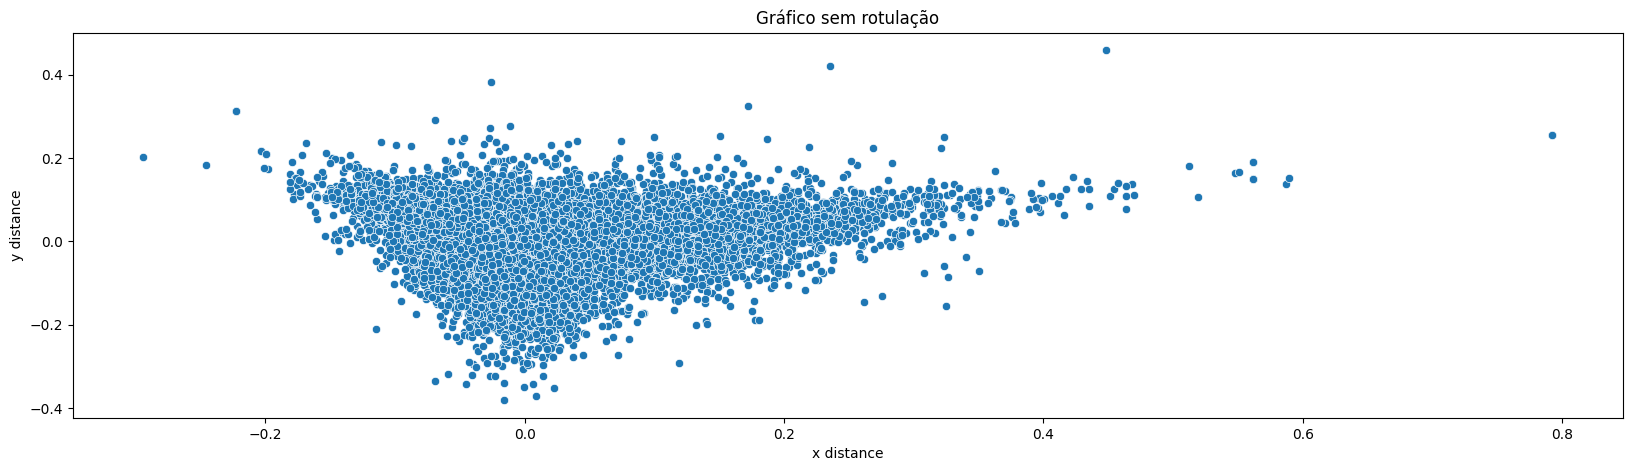

In [ ]:
plt.figure(figsize=(20,5))

sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], palette='Set2')


plt.xlabel('x distance')
plt.ylabel('y distance')
plt.title('Gráfico sem rotulação')

Text(0.5, 1.0, 'Gráfico com rotulação')

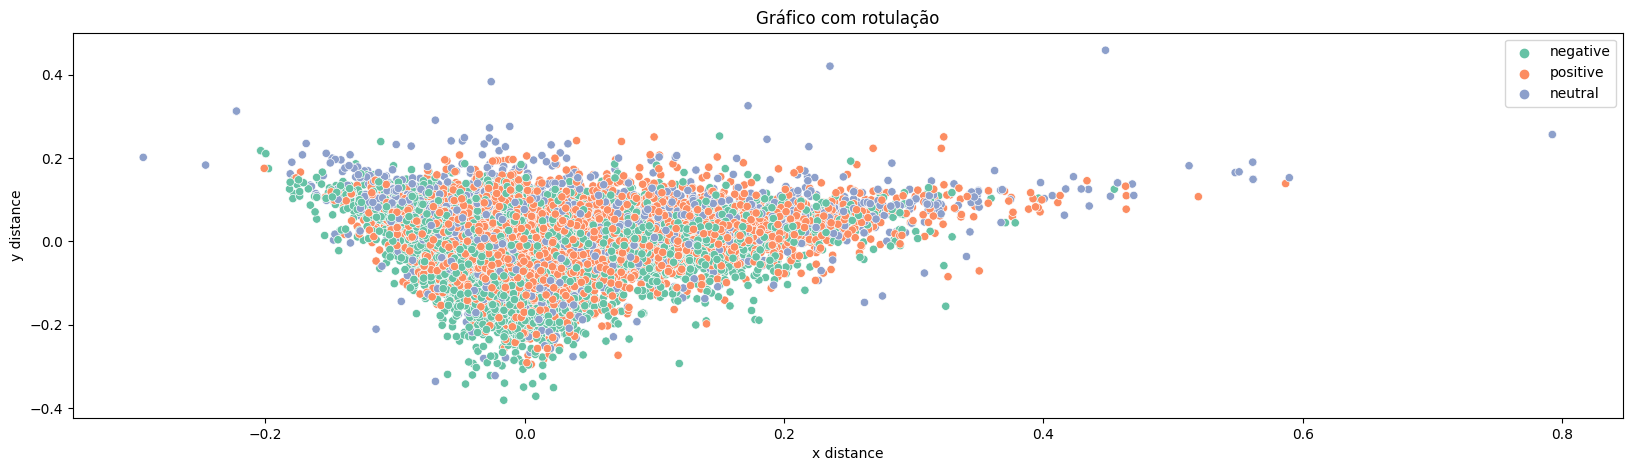

In [ ]:
plt.figure(figsize=(20,5))

sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['sentiment'].tolist(), palette='Set2', legend="full", )


plt.xlabel('x distance')
plt.ylabel('y distance')
plt.title('Gráfico com rotulação')

In [22]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = df["sentiment"]
y = le.fit_transform(y)

Treinamento

In [23]:
#Creating a function to display model results
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

def evaluation_parametrics(name,y_test, y_pred):
    cm_test = confusion_matrix(y_test, y_pred )
    t1 = ConfusionMatrixDisplay(cm_test, display_labels=["Positive","Neutral","Negative"])    
    print("Classification Report for Data Test")
    print(classification_report(y_test, y_pred))
    t1.plot()

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.3, random_state=42)


log = LogisticRegression(random_state=42)
log.fit(X_train, y_train)


LogisticRegression(random_state=42)

In [25]:

y_pred = log.predict(X_test)

micro_f1 = f1_score(y_test, y_pred,average='micro')
macro_f1 = f1_score(y_test, y_pred,average='macro')

print("Modelo Logist Regression")
print(f"Macro: {macro_f1} ")
print(f"Micro: {micro_f1}")

Modelo Logist Regression
Macro: 0.7231660872996916 
Micro: 0.7577057089252212


Classification Report for Data Test
              precision    recall  f1-score   support

           0       0.76      0.78      0.77      2789
           1       0.71      0.51      0.59      1395
           2       0.77      0.84      0.80      3278

    accuracy                           0.76      7462
   macro avg       0.75      0.71      0.72      7462
weighted avg       0.75      0.76      0.75      7462



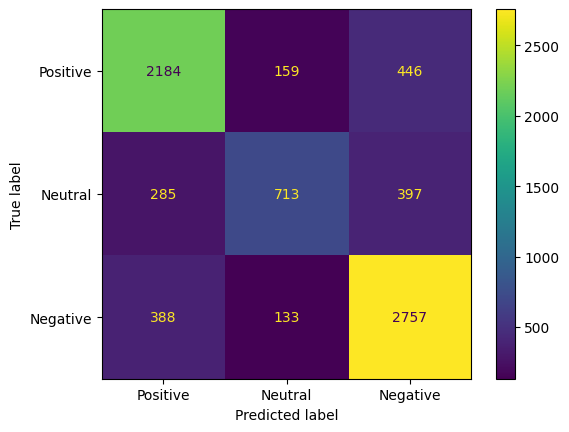

In [26]:
#Visualizing model results
evaluation_parametrics("Machine Learning - Classification", y_test, y_pred)

In [27]:

log = LogisticRegression(random_state=42,penalty='none')
log.fit(X_train, y_train)

LogisticRegression(penalty='none', random_state=42)

In [28]:
y_pred = log.predict(X_test)

micro_f1 = f1_score(y_test, y_pred,average='micro')
macro_f1 = f1_score(y_test, y_pred,average='macro')

print("Modelo Logist Regression")
print(f"Macro: {macro_f1} ")
print(f"Micro: {micro_f1}")

Modelo Logist Regression
Macro: 0.7187653881927577 
Micro: 0.7492629321897616


In [29]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import f1_score

sgd = SGDClassifier(random_state=42,alpha=0.0001)
sgd.fit(X_train, y_train)

SGDClassifier(random_state=42)

In [30]:
y_pred = sgd.predict(X_test)

micro_f1 = f1_score(y_test, y_pred,average='micro')
macro_f1 = f1_score(y_test, y_pred,average='macro')


print("Modelo SGD")
print(f"Macro: {macro_f1} ")
print(f"Micro: {micro_f1}")

Modelo SGD
Macro: 0.7107173080771041 
Micro: 0.7535513267220584


Classification Report for Data Test
              precision    recall  f1-score   support

           0       0.69      0.87      0.77      2789
           1       0.75      0.44      0.56      1395
           2       0.82      0.79      0.81      3278

    accuracy                           0.75      7462
   macro avg       0.76      0.70      0.71      7462
weighted avg       0.76      0.75      0.75      7462



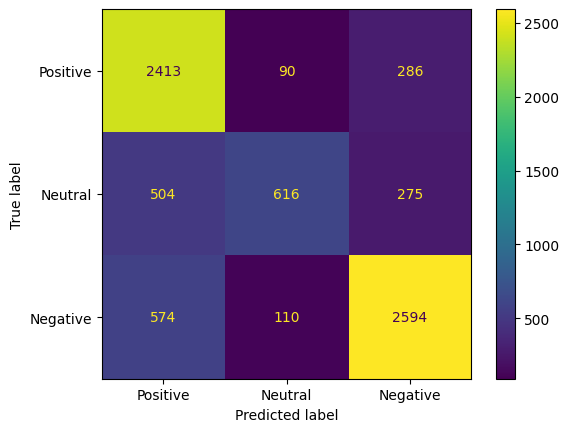

In [31]:
#Visualizing model results
evaluation_parametrics("Machine Learning - Classification", y_test, y_pred)

In [32]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import f1_score

sgd = SGDClassifier(random_state=42,penalty='elasticnet')
sgd.fit(X_train, y_train)


SGDClassifier(penalty='elasticnet', random_state=42)

In [33]:
y_pred = sgd.predict(X_test)

micro_f1 = f1_score(y_test, y_pred,average='micro')
macro_f1 = f1_score(y_test, y_pred,average='macro')


print("Modelo SGD")
print(f"Macro: {macro_f1} ")
print(f"Micro: {micro_f1}")

Modelo SGD
Macro: 0.7376504520441945 
Micro: 0.7676226212811579


In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score

tree = DecisionTreeClassifier(random_state=42, splitter='random')
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42, splitter='random')

In [35]:
y_pred = tree.predict(X_test)

micro_f1 = f1_score(y_test, y_pred,average='micro')
macro_f1 = f1_score(y_test, y_pred,average='macro')

print("Modelo de AD")
print(f"Macro: {macro_f1} ")
print(f"Micro: {micro_f1}")

Modelo de AD
Macro: 0.5945506300406481 
Micro: 0.6140444920932726


Classification Report for Data Test
              precision    recall  f1-score   support

           0       0.62      0.60      0.61      2789
           1       0.48      0.54      0.51      1395
           2       0.68      0.66      0.67      3278

    accuracy                           0.61      7462
   macro avg       0.59      0.60      0.59      7462
weighted avg       0.62      0.61      0.62      7462



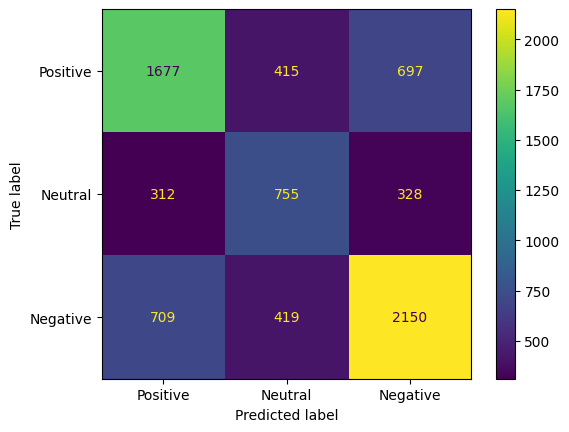

In [36]:
#Visualizing model results
evaluation_parametrics("Machine Learning - Classification", y_test, y_pred)

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score

tree = DecisionTreeClassifier(criterion="entropy",random_state=42, splitter='random')
tree.fit(X_train, y_train)

In [ ]:
y_pred = tree.predict(X_test)

micro_f1 = f1_score(y_test, y_pred,average='micro')
macro_f1 = f1_score(y_test, y_pred,average='macro')

print("Modelo de AD")
print(f"Macro: {macro_f1} ")
print(f"Micro: {micro_f1}")

Modelo de AD
Macro: 0.60140212499457 
Micro: 0.6183328866255695


CONSISTENCIA


In [ ]:


X_train30, X_test30, y_train30, y_test30  = train_test_split(X_train, y_train, train_size=0.3, random_state=42)
X_train60, X_test60, y_train60, y_test60  = train_test_split(X_train, y_train, train_size=0.6, random_state=42)
X_train90, X_test90, y_train90, y_test90  = train_test_split(X_train, y_train, train_size=0.9, random_state=42)

MODELO COM 30%

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import f1_score

sgd = SGDClassifier(random_state=42, loss='log_loss')
sgd.fit(X_train30, y_train30)

SGDClassifier(loss='log_loss', random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score

tree = DecisionTreeClassifier()
tree.fit(X_train30, y_train30)

DecisionTreeClassifier()

In [ ]:
y_pred_GD = sgd.predict(X_test30)
y_pred_AD = tree.predict(X_test30)

micro_GD = f1_score(y_test30, y_pred_GD,average='micro')
macro_GD = f1_score(y_test30, y_pred_GD,average='macro')

micro_AD = f1_score(y_test30, y_pred_AD,average='micro')
macro_AD = f1_score(y_test30, y_pred_AD,average='macro')


print("MODELO COM 30% DE TREINO")
print("\nGRADIENTE DESCEDENTE\n")
print(f"Macro para GD : {macro_GD} ")
print(f"Micro para GD: {micro_GD}\n")

print("\nARVORE DECISÃO\n")

print(f"Macro para AD: {macro_AD} ")
print(f"Micro para AD: {micro_AD}")

MODELO COM 30% DE TREINO

GRADIENTE DESCEDENTE

Macro para GD : 0.6300575647281463 
Micro para GD: 0.6970542381225896


ARVORE DECISÃO

Macro para AD: 0.5611945355806952 
Micro para AD: 0.576515959629113


MODELO COM 60%

In [ ]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier(random_state=42, loss='log_loss')
sgd.fit(X_train60, y_train60)

SGDClassifier(loss='log_loss', random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(X_train60, y_train60)

DecisionTreeClassifier()

In [ ]:
y_pred_GD = sgd.predict(X_test60)
y_pred_AD = tree.predict(X_test60)

micro_GD = f1_score(y_test60, y_pred_GD,average='micro')
macro_GD = f1_score(y_test60, y_pred_GD,average='macro')

micro_AD = f1_score(y_test60, y_pred_AD,average='micro')
macro_AD = f1_score(y_test60, y_pred_AD,average='macro')

print("MODELO COM 60% DE TREINO")
print("\nGRADIENTE DESCEDENTE\n")
print(f"Macro para GD : {macro_GD} ")
print(f"Micro para GD: {micro_GD}\n")

print("\nARVORE DECISÃO\n")

print(f"Macro para AD: {macro_AD} ")
print(f"Micro para AD: {micro_AD}")

MODELO COM 60% DE TREINO

GRADIENTE DESCEDENTE

Macro para GD : 0.6546909975943916 
Micro para GD: 0.7192705341757609


ARVORE DECISÃO

Macro para AD: 0.6027147266989584 
Micro para AD: 0.619902354968409


MODELO 90%

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import f1_score

sgd = SGDClassifier(random_state=42, loss='log_loss')
sgd.fit(X_train90, y_train90)

SGDClassifier(loss='log_loss', random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score

tree = DecisionTreeClassifier()
tree.fit(X_train90, y_train90)

DecisionTreeClassifier()

In [ ]:
y_pred_GD = sgd.predict(X_test90)
y_pred_AD = tree.predict(X_test90)

micro_GD = f1_score(y_test90, y_pred_GD,average='micro')
macro_GD = f1_score(y_test90, y_pred_GD,average='macro')

micro_AD = f1_score(y_test90, y_pred_AD,average='micro')
macro_AD = f1_score(y_test90, y_pred_AD,average='macro')

print("MODELO COM 90% DE TREINO")
print("\nGRADIENTE DESCEDENTE\n")
print(f"Macro para GD : {macro_GD} ")
print(f"Micro para GD: {micro_GD}\n")

print("\nARVORE DECISÃO\n")

print(f"Macro para AD: {macro_AD} ")
print(f"Micro para AD: {micro_AD}")

MODELO COM 90% DE TREINO

GRADIENTE DESCEDENTE

Macro para GD : 0.6570215094390746 
Micro para GD: 0.7151062607696727


ARVORE DECISÃO

Macro para AD: 0.5902832388978284 
Micro para AD: 0.6082711085582998


In [ ]:
df['label'] = pred_labels
df = df[['OriginalTweet','label']]
label1 = df[df['label']==0]
label2 = df[df['label']==1]
label3 = df[df['label']==2]
words1 = get_word(get_all_str(label1['OriginalTweet']))
words2 = get_word(get_all_str(label2['OriginalTweet']))
words3 =  get_word(get_all_str(label3['OriginalTweet']))
df1 = Freq_df(words1)
df2 = Freq_df(words2)
df3 = Freq_df(words3)

In [ ]:
import plotly.graph_objects as go
fig = go.Figure(data=[
    go.Bar(name='Negativos', x=df1['Term'][:20].values, y=df1['Frequency'][:20].values,text=df1['Frequency'][:20].values,marker_color='red'),
    go.Bar(name='Neutros', x=df2['Term'][:20].values, y=df2['Frequency'][:20].values,text=df1['Frequency'][:20].values,marker_color='yellow'),
    go.Bar(name='Positivos', x=df3['Term'][:20].values, y=df3['Frequency'][:20].values,text=df1['Frequency'][:20].values,marker_color='blue')
])
fig.update_layout(barmode='stack', xaxis_tickangle=-45,title='top 20 termos frequentes em cada cluster', template='simple_white')

fig.show()

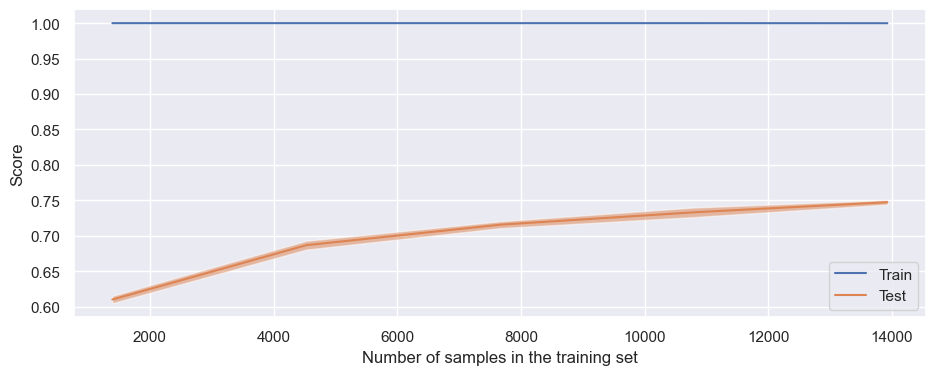

In [ ]:
from sklearn.model_selection import LearningCurveDisplay, ValidationCurveDisplay
from sklearn.linear_model import LogisticRegression
LearningCurveDisplay.from_estimator(log, X_train, y_train)
plt.show()

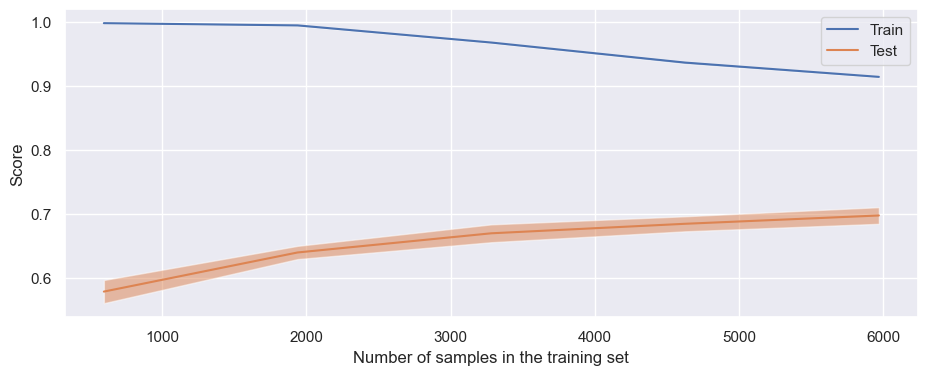

In [ ]:
from sklearn.model_selection import LearningCurveDisplay, ValidationCurveDisplay
from sklearn.linear_model import LogisticRegression
LearningCurveDisplay.from_estimator(sgd, X_test, y_test)
plt.show()